<h1> Demostración de la conjetura para $m_2\geq 1$ </h4>


In [1]:
from sympy import *
init_printing() #muestra símbolos más agradab
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np
R=lambda n,d: Rational(n,d)

<h2> 1. ¿Cuando $q_1=c$ ? </h2>

Lo que viene en esta sección en realidad no es necesario para la demostración de la conjetura. Vamos a demostrar que la única forma que la masa del medio en una configuración central colineal este sobre el centro de masas es que las masas de los extremos sean iguales.

<b> Teorema </b> Supogamos una configuración central colineal de masas $1$,$m_1$ y $m_2$ en posiciones $0,1,1+r$, con $r>0$. Si $c$ es el centro de masa, $c=1$ si y solo si $m_2=1$.

<b>Dem.</b>


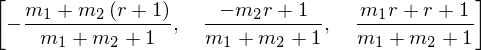

In [29]:
m=symbols('m0:%s' %3, positive=True) #masas
var('r')#r 
m=[1,m[1],m[2]]# la masa m0 es 1
x=[0,1,1+r]#posiciones
c=sum([m[j]*x[j]/sum(m) for j in range(3)]) #centro masas
q=[(h-c).simplify() for h in x] #coordenadas varicentricas
solve(c-1)#hallamos cuando Se tiene que dar m2=1/r
q

Hasta aquí hemos probado que $m_2=1/r$. Pero $r$ debe satisfacer la ecuación de Euler

In [3]:
f=r**5 + 3*r**4 + 3*r**3 + m[1]*r**5 + 2*m[1]*r**4 + m[1]*r**3 - m[1]*r**2 - 2*m[1]*r - m[1] - 3*m[2]*r**2 - 3*m[2]*r - m[2]


El polinomio $f$ depende de $m_1,m_2$ y $r$ ($f=f(m_1,m_2,r)$). Se debe cumplir $f(m_1,m_2,\frac{1}{m_2})=0$

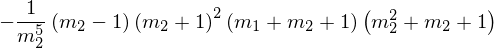

In [4]:
f.subs({r:m[2]**(-1)}).factor()

La única solución con $m_1>0$ y $m_2>0$ es $m_2=1$ y $m_1>0$ puede ser cualquier masa positiva. Este resultado es físicamente evidente.

<h2> 2. $r(m_1,m_2)$ es concava respecto a $m_2$ para $m_1$ fijo</h2>

<b> Teorema 2.</b>  $r(m_1,m_2)$ es concava respecto a $m_2$ para $m_1$ 

<b>Dem.</b> Veamos que $\frac{\partial^2 r}{\partial m_2^2}<0$. Calculamos la derivada siguiendo la derivación de una función implícita. En la expresión de $f$ sustituyo $r$ por una función de $m_1,m_2$ que llamo $R(m_1,m_2)$. A la expresión que resulta $f_1$ la derivo respecto a $m_2$ y despejo $\frac{\partial R}{\partial m_2}$ en función de $R$. 

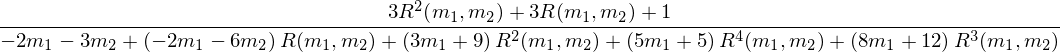

In [5]:
R=Function('R')(m[1],m[2])
f1=f.subs(r,R)
f1=f1.diff(m[2])
r_m2=solve(f1,R.diff(m[2]))[0].collect(R)
r_m2

La expresión  <b>r_m2</b> es la derivada $\partial r/\partial m_2$ escrita en función de $R(m_1,m_2)$. En la celda debajo derivo <b>r_m2</b> respecto a $m_2$, aparece nuevamente $\frac{\partial R}{\partial m_2}$ lo sustituyo por <b>r_m2</b>. Por último, vuelvo a sustiruir $R$ por $r$ por simplicidad

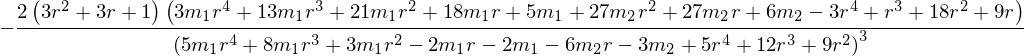

In [6]:
f2=r_m2.diff(m[2]).subs(R.diff(m[2]),r_m2).subs(R,r)
f2.simplify().factor()


Hay que demostrar que la expresión es negativa. Tomo los dos factores que no tienen un signo definido y los estudio por separado.

In [7]:
num=(3*m[1]*r**4 + 13*m[1]*r**3 + 21*m[1]*r**2 + 18*m[1]*r + 5*m[1] + 27*m[2]*r**2 + 27*m[2]*r + 6*m[2] - 3*r**4 + r**3 + 18*r**2 + 9*r)
dem=5*m[1]*r**4 + 8*m[1]*r**3 + 3*m[1]*r**2 - 2*m[1]*r - 2*m[1] - 6*m[2]*r - 3*m[2] + 5*r**4 + 12*r**3 + 9*r**2


Creo que el teorema de Descartes implica que el cociente de estas expresiones cambian de signo. Ahora aquí nos hemos olvidado que $r=r(m_1,m_2)$, i.e. no se puede variar $r$ independientemente de $m_1,m_2$, sino que  $m_1,m_2,r$ estan relacionados por la ecuación de Euler. La idea sería ver que si reemplazo $r$ por su expresión en $m_1,m_2$ quedan expresiones con signo definido. Claro que no disponemos de una fórmula para $r$. Trato de usar la fórmula de Gastón
$$ r^3=\frac{m_2(3r^2+3r+1)+m_1(r+1)^2}{(r^2+3r+3)+m_1(r+1)^2}=:g$$
La utilizo para reemplazar $r^3$ por $g$ y $r^4$ por $rg$


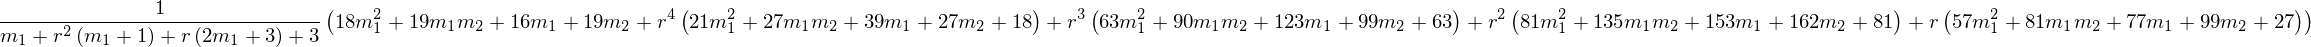

In [8]:
g=(m[2]*(3*r**2+3*r+1)+m[1]*(r+1)**2)/((r**2+3*r+3)+m[1]*(r+1)**2)
num.collect(r).subs({r**4:g*r,r**3:g}).factor().collect(r)

La expresión tiene sólo términos positivos. Hago lo mismo con "dem"

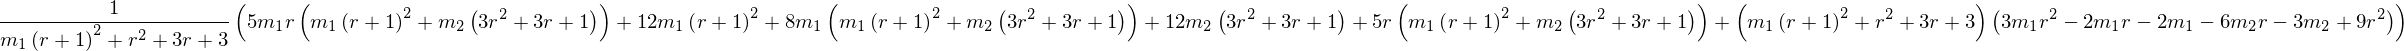

In [9]:
dem.subs({r**4:g*r,r**3:g}).simplify()

También aparecen sólo términos positivos. Por consiguiente se llega a lo que quería. $\square$

<h3> Demostración conjetura para $m_2>1$. </h3> 

Recordemos 

$$U<\frac{m_i^2}{|q_i|}+\frac{m_{i+1}^2}{|q_{i+1}|}$$ 
donde $i=0$ o $i=1$ acorde a que el centro de masas $c$ satisface $c\in [q_i,q_{i+1}]$


Teniendo en cuenta que $r$ es concava respecto a $m_2$ y que $r>1$ cuando $m_2>1$, vamos usar como cotas de $r$, la constante $1$ y la recta tangente respecto a la variable $m_2$, con $m_1$ fijo. Evaluemos $\left.\frac{\partial r}{\partial m_2}\right|_{m_2=1}$ (notar que $\forall m_1>0: r(m_1,1)=1$).


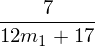

In [10]:
r_m2.subs({R:1,m[2]:1})

Luego por concavidad si $m_2>1$
$$r(m_1,m_2)\leq \frac{7}{12m_1+17}(m_2-1)+1\leq m_2.$$
        

In [39]:
var('r',positive=True) #introducimos la suposicion r>0
x=[0,1,1+r]#posiciones
c=sum([m[j]*x[j]/sum(m) for j in range(3)]) #centro masas
q=[(h-c).simplify() for h in x] #coordenadas varicentricas
U=sum([ sum([m[i]*m[j]/abs(x[i]-x[j]) for i in range(j) ]) for j in range(3)]) #potencial
Q=[m[i]**2/abs(q[i]) for i in range(3)]


Supongamos $m_2>1$. Entonces $r>1$ y $c>1$, es decir $c$ estra entre la segunda y tercer masas. Entoces $q_1<0$ y $q_2>0$

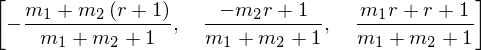

In [40]:
q

In [43]:
Q=m[1]**2/(-q[1])+m[2]**2/q[2]

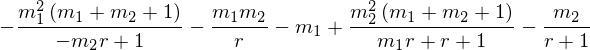

In [44]:
Exp=-U+Q
Exp

Ahora sabemos que $1<r<\frac{7}{12m_1+17}(m_2-1)+1$, acotamos $r$ en cada termino de  <b>Exp</b> por el correspondiente valor para acotar por debajo <b>Exp</b> 

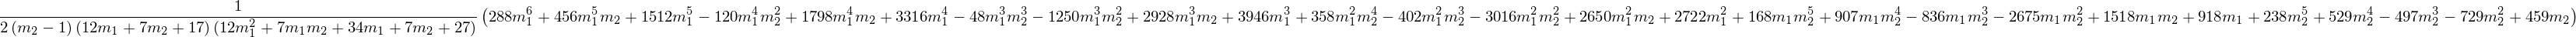

In [48]:
Rem=7/(12*m[1]+17)*(m[2]-1)+1
Exp2=m[1]**2*(m[1] + m[2] + 1)/(m[2]*Rem- 1) - m[1]*m[2] - m[1] + m[2]**2*(m[1]+ m[2] + 1)/(m[1] *Rem+ Rem + 1) - m[2]/2
Exp2.factor().simplify()

<h3>Experimento numérico</h3> Habría que ver que el segundo factor es positivo. Vamos a hacer primero un experimento numérico que confirme la aseveración. 

In [49]:
M1=np.arange(0,1,.01)
M2=np.arange(1,1.2,.01)
X,Y=np.meshgrid(M1,M2)
#Z=12*X*Y-12*X+7*Y**2-17
Z=288*X**6 + 456*X**5*Y + 1512*X**5 - 120*X**4*Y**2 + 1798*X**4*Y + 3316*X**4 - 48*X**3*Y**3 - 1250*X**3*Y**2 + 2928*X**3*Y + 3946*X**3 + 358*X**2*Y**4 - 402*X**2*Y**3 - 3016*X**2*Y**2 + 2650*X**2*Y + 2722*X**2 + 168*X*Y**5 + 907*X*Y**4 - 836*X*Y**3 - 2675*X*Y**2 + 1518*X*Y + 918*X + 238*Y**5 + 529*Y**4 - 497*Y**3 - 729*Y**2 + 459*Y


In [50]:
fig=plt.figure()
ax=Axes3D(fig)
Z=np.minimum(Z,100*np.ones(np.shape(Z)))
Z=np.maximum(Z,-1*np.ones(np.shape(Z)))
ax.plot_surface(X,Y,Z,rstride=1, cstride=1, cmap=cm.coolwarm,linewidth=0, antialiased=False)
#V=[k for k in [-20,0,20]]#np.arange(-20,20,1)]
#cp = plt.contour(X, Y, Z,V)
#plt.clabel(cp, inline=True,fontsize=10)
plt.xlabel('m1')
plt.ylabel('m2')
plt.show()






#fig = plt.figure()

#ax = fig.add_subplot(111, projection='3d')

<img src="https://raw.githubusercontent.com/fdmazzone/ArchivosProyecto/master/MEcanica%20Celeste/CotaSustTang.png" width="50%" height="50%"/>

In [51]:
fig=plt.figure()
V=[k**2-10 for k in range(200)]#np.arange(-20,20,1)]
cp = plt.contour(X, Y, Z,V)
plt.clabel(cp, inline=True,fontsize=10)
plt.xlabel('m1')
plt.ylabel('m2')
plt.show()

<img src="https://raw.githubusercontent.com/fdmazzone/ArchivosProyecto/master/MEcanica%20Celeste/CotaSustTangNivel.png" width="50%" height="50%"/>

Tomamos ese monstruoso segundo factor. Tiene términos positivos y negativos, pero se ve mejor si tomamos dos variables nuevas $s$ y $\alpha$, positivas y sustituímos $m_1=s$ y $m_2=1+\alpha s$, expandimos la expresión y luego agrupamos de acuerdo con potencias de $s$.

In [55]:
Monstruo=288*m[1]**6 + 456*m[1]**5*m[2] + 1512*m[1]**5+ 1798*m[1]**4*m[2] + 3316*m[1]**4 + 2928*m[1]**3*m[2] + 3946*m[1]**3 + 358*m[1]**2*m[2]**4+ 2650*m[1]**2*m[2] + 2722*m[1]**2 + 168*m[1]*m[2]**5 + 907*m[1]*m[2]**4  + 1518*m[1]*m[2] + 918*m[1] + 238*m[2]**5 + 529*m[2]**4 - 497*m[2]**3 - 729*m[2]**2 + 459*m[2] - 120*m[1]**4*m[2]**2  - 3016*m[1]**2*m[2]**2 - 48*m[1]**3*m[2]**3  - 402*m[1]**2*m[2]**3- 836*m[1]*m[2]**3 - 1250*m[1]**3*m[2]**2- 2675*m[1]*m[2]**2
var('alpha,s',positive=True)
Monstruo.subs({m[1]:s,m[2]:alpha*s+1}).expand().collect(s)

En la expresión que resulta, todos los polinomios en $\alpha$ que acompañan a potencias de $s$ son positivos para $\alpha>0$. Lo razono con uno de ellos, en los otros es igual. Supongamos el de $s^4$: 
$$p(\alpha)=1719\alpha^4+4472\alpha^3-2074\alpha^2+284\alpha+4994$$
El caso es que cuando $\alpha\leq 1$ el término $-2074\alpha^2$ es dominado por el 4994. En cambio cuando $\alpha\geq 1$ el término $-2074\alpha^2$ lo domina el  $4472\alpha^3$. En todos los polinomios que corresponden a distintas potencias de $\alpha$ se aplica un razonamiento similar.  